<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendisaje Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 12/09*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Supervisado

Esta entrega es una continuación del trabajo anterior, donde se agregan nuevos algoritmos para evaluar en nuestro dataSet. 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Utilizar la configuración del dataset empleada en el trabajo anterior, en lo que respecta al balanceo del dataset. 

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir las mas representativas.

##### Explorarción de algoritmos de clasificación: 
 1. Entrenar el modelo sin parámetros y tomarlo como baseline. Revisar documentación para identificar los parámetros correspondientes.

 2. Utilizar CV para encontrar los parámetros para encontrar el mejor modelo de cada uno de ellos. 
 
 3. Graficar la métrica elegida con respecto al cambio de los parámetros en los conjuntos 'test' y 'train'.

 4. Hacer una tabla para comparar los mejores modelos de cada algoritmo.
 
 5. Visualizar los resultados por medio de:
    * Matriz de Confusión
    * Reporte de Clasificación
    * Curvas ROC
 
Explorar los algoritmos:
 * Regresión Logistica 
 * NaiveBayes
 * SVM

Probar luego métodos de [ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble):
 * Random Forest
 * Boosting
 * Luego probar con los modelos mas sensillos, métodos de voting y ver si mejoran los resultados.
Pueden probar [VotingClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


Extra si les queda tiempo:
 * Redes neuronales, con las imágenes como datos de entrada. 

 
Automatizar lo mas posible el proceso. 

Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).



### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [119]:
# Importación de las librerías necesarias 
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [120]:
# Se carga el dataset de entrenamiento
train = pd.read_csv("https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_train_crop_features_labels.csv", index_col=0, low_memory=False)

In [121]:
# Se carga el dataset de test 
test = pd.read_csv('https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_test_crop_features_labels.csv', index_col=0, low_memory=False )

In [122]:
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [123]:
test.head()

filename  width  ...      2046      2047
0  Video1-frame-000004_single_box_0.jpg    640  ...  0.499648  0.015035
1  Video1-frame-000021_single_box_0.jpg    640  ...  0.372580  0.057565
2  Video1-frame-000039_single_box_0.jpg    640  ...  0.631417  0.047634
3  Video1-frame-000040_single_box_0.jpg    640  ...  0.583134  0.020465
4  Video1-frame-000049_single_box_0.jpg    640  ...  0.616542  0.032798

[5 rows x 2063 columns]

In [124]:
# Observamos el número de filas y columnas del dataset de entrenamiento
train.shape


(1913, 2063)

In [125]:
# Observamos el número de filas y columnas del dataset de test
test.shape

(495, 2063)

In [126]:
# Obtenemos la columna objetivo del dataset de entrenamiento
y_train = train[['clase']]

In [127]:
# Obtenemos la columna objetivo del dataset de test
y_test = test[['clase']]

In [128]:
# Transformamos las etiquetas categóricas a númericas para el dataset de entrenamiento
le = preprocessing.LabelEncoder()
le.fit(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [129]:
# Transformamos las etiquetas categóricas a númericas para el dataset de entrenamiento
y_train_enc = le.transform(y_train)  


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
# Se transforma a un dataframe de pandas
y_train_LE = pd.DataFrame(y_train_enc)

In [131]:
# SE realizan las mismas transformaciones a la variable objetivo del dataset test
le.fit(y_test)
y_test_enc = le.transform(y_test)
y_test_LE = pd.DataFrame(y_test_enc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regresión Logística baseline
Muy brevemente, la regresión logística es un modelo lineal de clasificación que describe y estima la relación entre una variable dependiente binaria y una o varias variables independientes. En un modelo de clasificación logística simple, las probabilidades que describen el resultado de un problema binario son modeladas utilizando la función logística.

In [132]:
# Obtenemos solo las variables numéricas del dataset entrenamiento para entrenar un modelo de regresión logística
train_numeric = train._get_numeric_data()
train_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0       640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1       640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2       640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3       640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4       640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094
...     ...     ...   ...   ...  ...       ...       ...       ...       ...
1908   1280     720  1168  1280  ...  0.278505  0.189561  0.501087  0.132643
1909   1280     720  1047  1231  ...  0.205289  0.409898  0.912477  0.043854
1910   1280     720   974  1151  ...  0.162134  0.758789  0.849687  0.150298
1911   1280     720   902  1074  ...  0.440513  0.482803  0.638911  0.262574
1912   1280     720   771   939  ...  0.207461  0.376891  0.677032  0.001313

[1913 rows x 2059 columns]

In [133]:
# Obtenemos solo las variables numéricas del dataset de test
test_numeric = test._get_numeric_data()
test_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0      640     360   301   364  ...  0.034357  0.005899  0.499648  0.015035
1      640     360   302   372  ...  0.026713  0.041257  0.372580  0.057565
2      640     360   302   370  ...  0.067228  0.011203  0.631417  0.047634
3      640     360   304   366  ...  0.011560  0.000363  0.583134  0.020465
4      640     360   301   370  ...  0.011605  0.015202  0.616542  0.032798
..     ...     ...   ...   ...  ...       ...       ...       ...       ...
490   1280     720   781   856  ...  0.106780  0.134364  0.511100  0.039986
491   1280     720   634   825  ...  0.150524  0.533963  0.263250  0.056921
492   1280     720   635   838  ...  0.162843  0.578889  0.408409  0.063361
493   1280     720   635   830  ...  0.174382  0.584406  0.256982  0.021594
494   1280     720   408   643  ...  0.222247  0.524002  1.120981  0.179200

[495 rows x 2059 columns]

In [152]:
# Seleccionamos las variables numéricas que mas se asocian a la variable categórica de interés utilizando el estadístico chi-squared
# Dataset entrenamiento
X_train_best = SelectKBest(chi2, k=20).fit_transform(train_numeric, y_train_LE)
X_train_best.shape

(1913, 20)

In [153]:
# Seleccionamos las variables numéricas que mas se asocian a la variable categórica de interés utilizando el estadístico chi-squared
# Dataset test
X_test_best = SelectKBest(chi2, k=20).fit_transform(test_numeric, y_test_LE)
X_test_best.shape

(495, 20)

Regresión Logística (LR) utilizando parámetros por default (baseline)

In [155]:
#Como paso de preprocesamiento realizamos un escalado de las variables
pipeline = Pipeline([("scaler", StandardScaler()),
                    ("LR", LogisticRegression())])
#Ajustamos el modelo de LR baseline utilizando las 20 variables independientes seleccionadas
pipeline.fit(X_train_best,y_train_enc)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Resultados para el modelo de LR baseline para el conjunto train 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1427
           1       0.97      0.93      0.95       486

    accuracy                           0.98      1913
   macro avg       0.98      0.96      0.97      1913
weighted avg       0.98      0.98      0.98      1913



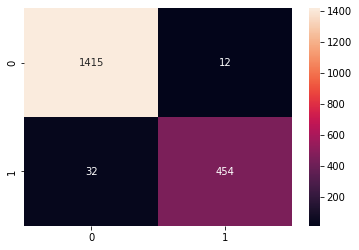

In [156]:
# Predecimos la variable dependiente en el dataset train utilizando el modelo LR baseline y las variables independientes seleccionadas
y_pred_train = pipeline.predict(X_train_best)
# Evaluamos el modelo LR baseline en el dataset train
print('Resultados para el modelo de LR baseline para el conjunto train \n')
sns.heatmap(confusion_matrix(y_train_enc, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_enc, y_pred_train))


Resultados para el modelo de LR baseline para el conjunto test 

              precision    recall  f1-score   support

           0       0.69      0.38      0.49       382
           1       0.16      0.42      0.24       113

    accuracy                           0.39       495
   macro avg       0.43      0.40      0.36       495
weighted avg       0.57      0.39      0.43       495



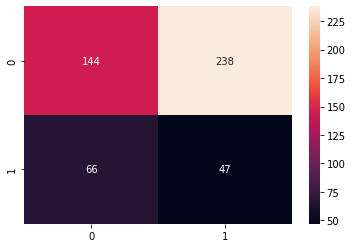

In [157]:
# Predecimos la variable dependiente en el dataset test utilizando el modelo LR baseline y las variables independientes seleccionadas
y_pred_test = pipeline.predict(X_test_best)
# Evaluamos el modelo LR baseline en el dataset test
print('Resultados para el modelo de LR baseline para el conjunto test \n')
sns.heatmap(confusion_matrix(y_test_enc, y_pred_test), annot=True, fmt='g')
print(classification_report(y_test_enc, y_pred_test))


Se realizará una búsqueda en grilla para establecer el valor óptimo de los siguientes hiperparámetros de la función logística

solver: algoritmo que va a ser utilizado en la función de optimización

penalty: tipo de regularización a ser utilizada.

C: Inversa de la fuerza de regularización o penalización

fit_intercept: Especifica si un sesgo o intercept tiene que ser agregado a la función de decisión.

In [158]:
%%time

# Grilla de hiperparámetros a evaluar
param_grid = {"LR__penalty": ["l1", "l2"],
              "LR__C": [1, 10, 100],
              "LR__fit_intercept": [True, False],
              "LR__solver": ["liblinear", "saga"]}

# Utilizamos un esquema de validación cruzada con 3 splits
kf = KFold(n_splits=3, shuffle=True, random_state=4)

# Utilizamos la métrica "accuracy" durante la validación cruzada de hiperparámetros
grid_model = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1, refit=True, return_train_score=True)




CPU times: user 66 µs, sys: 0 ns, total: 66 µs
Wall time: 71 µs


In [159]:
#Ajustamos el modelo
grid_model.fit(X_train_best,y_train_enc)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('LR',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                  

In [160]:
# Evaluamos cuales fueron los valores óptimos de los hiperparámetros
grid_model.best_params_

{'LR__C': 1,
 'LR__fit_intercept': True,
 'LR__penalty': 'l2',
 'LR__solver': 'liblinear'}

In [161]:
#Observamos los valores promedios de la métrica de evaluación durante la validación cruzada para cada una de las combinaciones de hiperparámetros posible
results = grid_model.cv_results_
df_grid = pd.DataFrame(results)
df_grid.head()

df_grid[['param_LR__C', 'param_LR__fit_intercept', 'param_LR__penalty', 'param_LR__solver','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


param_LR__C param_LR__fit_intercept  ... std_test_score rank_test_score
2            1                    True  ...       0.004496               1
3            1                    True  ...       0.004496               1
1            1                    True  ...       0.002560               3
0            1                    True  ...       0.005175               4
19         100                    True  ...       0.004853               5
17         100                    True  ...       0.004853               5
9           10                    True  ...       0.004853               5
11          10                    True  ...       0.004853               5
10          10                    True  ...       0.003839               9
8           10                    True  ...       0.003906              10
16         100                    True  ...       0.002659              10
18         100                    True  ...       0.002659              10
6            1                   False  ...       0.005540              13
7            1                   False  ...       0.005540              13
13          10                   False  ...       0.003346              15
15          10                   False  ...       0.003346              15
21         100                   False  ...       0.003346              15
23         100                   False  ...       0.003346              15
5            1                   False  ...       0.007011              19
4            1                   False  ...       0.005873              20
12          10                   False  ...       0.005134              21
14          10                   False  ...       0.005134              21
22         100                   False  ...       0.005289              23
20         100                   False  ...       0.005289              23

[24 rows x 7 columns]

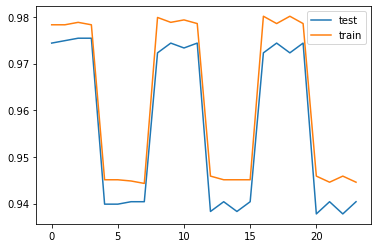

In [162]:
#Graficamos
test_scores = grid_model.cv_results_['mean_test_score']
train_scores = grid_model.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


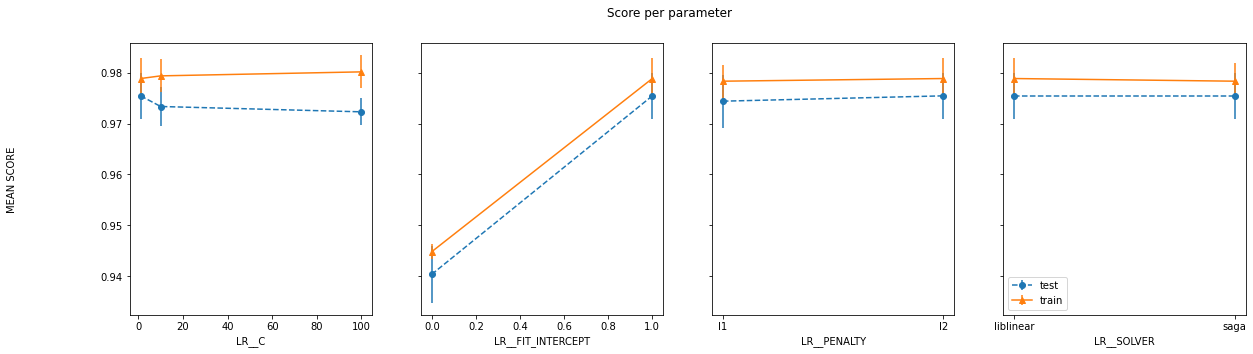

In [163]:
#Graficamos las métricas de evaluación promedio durante la validación cruzada discriminando por hiperparámetro
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
## Results from grid search
results = grid_model.cv_results_
means_test = results['mean_test_score']
stds_test = results['std_test_score']
means_train = results['mean_train_score']
stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
masks=[]
masks_names= list(grid_model.best_params_.keys())
for p_k, p_v in grid_model.best_params_.items():
  masks.append(list(results['param_'+p_k].data==p_v))

params=grid_model.param_grid

## Ploting results
fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
fig.suptitle('Score per parameter')
fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}
for i, p in enumerate(masks_names):
  m = np.stack(masks[:i] + masks[i+1:])
  pram_preformace_in_best
  best_parms_mask = m.all(axis=0)
  best_index = np.where(best_parms_mask)[0]
  x = np.array(params[p])
  y_1 = np.array(means_test[best_index])
  e_1 = np.array(stds_test[best_index])
  y_2 = np.array(means_train[best_index])
  e_2 = np.array(stds_train[best_index])
  ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
  ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
  ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

Entrenamos un modelo de LR utilizando los valores óptimos de los hiperparámetros obtenidos durante la validación cruzada

In [164]:
pipeline_best = Pipeline([("scaler", StandardScaler()),
                    ("LR", LogisticRegression(random_state=42, C = 1.0, fit_intercept=True, penalty='l2', solver = 'liblinear'))])
pipeline_best.fit(X_train_best,y_train_enc)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1444
           1       0.94      0.97      0.95       469

    accuracy                           0.98      1913
   macro avg       0.96      0.97      0.97      1913
weighted avg       0.98      0.98      0.98      1913



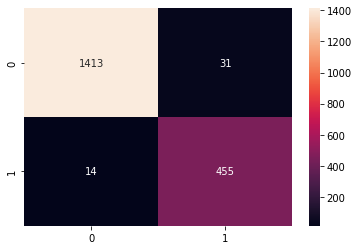

In [165]:
# Predecimos la variable dependiente en el dataset train utilizando el modelo LR best y las variables independientes seleccionadas
y_pred_train_best = pipeline_best.predict(X_train_best)
# Evaluamos el modelo LR best en el dataset train
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_pred_train_best, y_train_enc), annot=True, fmt='g')
print(classification_report(y_pred_train_best, y_train_enc))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.31      0.63      0.42       190
           1       0.38      0.14      0.21       305

    accuracy                           0.33       495
   macro avg       0.35      0.39      0.31       495
weighted avg       0.36      0.33      0.29       495



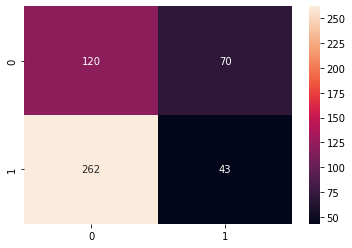

In [166]:
# Predecimos la variable dependiente en el dataset test utilizando el modelo LR best y las variables independientes seleccionadas
y_pred_test_best = pipeline_best.predict(X_test_best)
# Evaluamos el modelo LR best en el dataset test
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_pred_test_best, y_test_enc), annot=True, fmt='g')
print(classification_report(y_pred_test_best, y_test_enc))

Evaluamos la performance del modelo LR best empleando las curvas ROC y Precision Recall para los dataset train y test

Curva ROC para Logistic Regression 



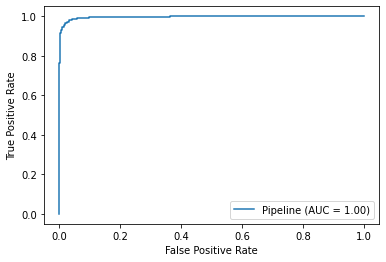

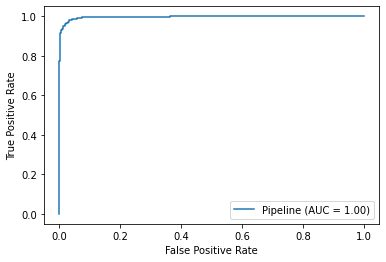

In [167]:
LR_baseline = plot_roc_curve(pipeline, X_train_best, y_train_enc) 
LR_best = plot_roc_curve(pipeline_best, X_train_best, y_train_enc) 
print('Curva ROC para Logistic Regression \n')


Curva Precision Recall para Logistic Regression 



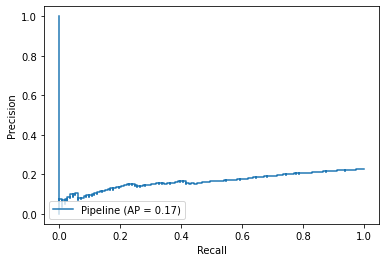

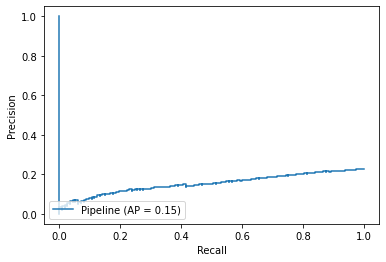

In [168]:
LR_baseline = plot_precision_recall_curve(pipeline, X_test_best, y_test_enc) 
LR_best = plot_precision_recall_curve(pipeline_best, X_test_best, y_test_enc) 
print('Curva Precision Recall para Logistic Regression \n')

Naive Bayes (NB)

En machine learning podríamos estar interesados en selecionar la mejor hipótesis (H) dado los datos (D). Si es un problema de clasificación. H podría ser asignar una clase a una dada instacia de datos nueva (D). Una de las maneras más fáciles de seleccionar la hipótesis más probable dado los datos que tenemos es usar nuestro conocimiento previo del problema El teorema de Bayes provee una manera de clacular la propabilidad de una hipótesis dado nuestro conocimiento previo. 

P(H|D) = (P(D|H) * P(H)) / P(D), donde P(H|D) es la probabilidad de H dado los datos D (probabilidad posterior); P(D|H) es la prob. de los datos D dado que la hipótesis H es verdadera; P(H) es la prob de que la hipótesis H sea cierta sin importar los datos (prob previa de H) y P(D) es la prob de los datos sin considerar la hipótesis.
Después de calcular la prob posterior para un número de diferentes hipótesis se puede seleccionar la H con la prob más alta.

El clasificador Naive Bayes permite la clasificación de problemas binarios. Se llama Naive porque asume inpendencia condicional, esto es P(D1|H) * P(D2|H)... en lugar de calcular  P(D1, D2, D3|H). Esto es, las variables no interactúan

In [85]:
pipeline_NB = Pipeline([("scaler", StandardScaler()),
                    ("NB", GaussianNB())])
#Ajustamos el modelo de NB baseline utilizando las 20 variables independientes seleccionadas
pipeline_NB.fit(X_train_best,y_train_enc)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('NB', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Resultados para el modelo  baseline de NB conjunto train 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1427
           1       0.97      0.93      0.95       486

    accuracy                           0.98      1913
   macro avg       0.98      0.96      0.97      1913
weighted avg       0.98      0.98      0.98      1913



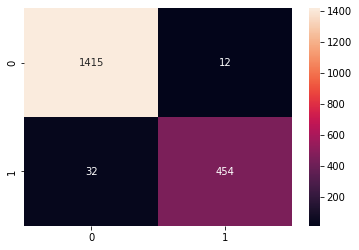

In [86]:
# Predecimos la variable dependiente en el dataset train utilizando el modelo NB baseline y las variables independientes seleccionadas
y_pred_train_NB = pipeline_NB.predict(X_train_best)
# Evaluamos el modelo NB baseline en el dataset train
print('Resultados para el modelo  baseline de NB conjunto train \n')
sns.heatmap(confusion_matrix(y_train_enc, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_enc, y_pred_train))

Resultados para el modelo  baseline de NB conjunto test 

              precision    recall  f1-score   support

           0       0.69      0.38      0.49       382
           1       0.16      0.42      0.24       113

    accuracy                           0.39       495
   macro avg       0.43      0.40      0.36       495
weighted avg       0.57      0.39      0.43       495



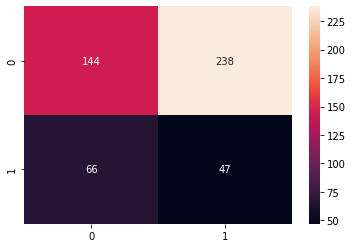

In [87]:
# Predecimos la variable dependiente en el dataset test utilizando el modelo NB baseline y las variables independientes seleccionadas
y_pred_test_NB = pipeline_NB.predict(X_test_best)
# Evaluamos el modelo NB baseline en el dataset test
print('Resultados para el modelo  baseline de NB conjunto test \n')
sns.heatmap(confusion_matrix(y_test_enc, y_pred_test), annot=True, fmt='g')
print(classification_report(y_test_enc, y_pred_test))

Para el modelo de NB Gaussiano solo se evaluara el hiperparámetro

var_soothing = porción de la variancia más grande que es agregada a todas las variables para calcular la estabilidad

In [169]:
%%time
pipeline_NB = Pipeline([("scaler", StandardScaler()),
                    ("NB", GaussianNB())])
# Grilla de hiperparámetros a evaluar
params_NB = {'NB__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}
# Utilizamos un esquema de validación cruzada con 3 splits
kf_NB = KFold(n_splits=3, shuffle=True, random_state=4)
# Utilizamos la métrica "accuracy" durante la validación cruzada de hiperparámetros
grid_model_NB = GridSearchCV(pipeline_NB, params_NB, cv=kf_NB, scoring='accuracy', n_jobs=-1, verbose=1, refit=True, return_train_score=True)


CPU times: user 273 µs, sys: 0 ns, total: 273 µs
Wall time: 283 µs


In [170]:
#Ajustamos el modelo
grid_model_NB.fit(X_train_best,y_train_enc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('NB',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'NB__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09,
                                               1e-08, 1e-07, 1e-06, 1e-05,
                                               0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verb

In [79]:
# Obtenemos el valor óptimo del hiperparámetro
grid_model_NB.best_params_

{'NB__var_smoothing': 1e-12}

In [171]:
#Observamos el valor promedio de la métrica de evaluación durante la validación cruzada para cada uno de los valores del hiperparámetro
results_NB = grid_model_NB.cv_results_
df_grid_NB = pd.DataFrame(results_NB)
df_grid_NB.head()

df_grid_NB[['param_NB__var_smoothing','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_NB__var_smoothing  mean_test_score  std_test_score  rank_test_score
0                   1e-12         0.970205        0.005571                1
1                   1e-11         0.970205        0.005571                1
2                   1e-10         0.970205        0.005571                1
3                   1e-09         0.970205        0.005571                1
4                   1e-08         0.970205        0.005571                1
5                   1e-07         0.970205        0.005571                1
6                   1e-06         0.970205        0.005571                1
7                   1e-05         0.970205        0.005571                1
8                  0.0001         0.970205        0.005571                1
9                   0.001         0.970205        0.005571                1

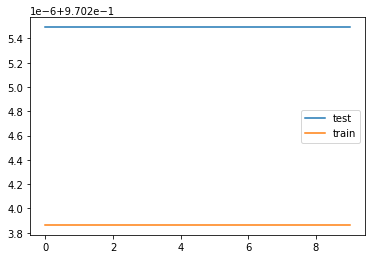

In [81]:
#Graficamos
test_scores_NB = grid_model_NB.cv_results_['mean_test_score']
train_scores_NB = grid_model_NB.cv_results_['mean_train_score'] 

plt.plot(test_scores_NB, label='test')
plt.plot(train_scores_NB, label='train')
plt.legend(loc='best')
plt.show()

Entrenamos un modelo de NB utilizando el valor óptimo del hiperparámetro obtenidos durante la validación cruzada

In [82]:
pipeline_NB_best = Pipeline([("scaler", StandardScaler()),
                    ("NB", GaussianNB(var_smoothing = 1e-12))])
pipeline_NB_best.fit(X_train_best,y_train_enc)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('NB', GaussianNB(priors=None, var_smoothing=1e-12))],
         verbose=False)

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1428
           1       0.94      0.94      0.94       485

    accuracy                           0.97      1913
   macro avg       0.96      0.96      0.96      1913
weighted avg       0.97      0.97      0.97      1913



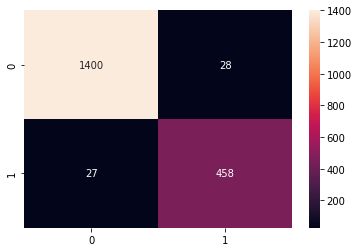

In [83]:
# Predecimos la variable dependiente en el dataset train utilizando el modelo NB best y las variables independientes seleccionadas
y_pred_train_best_NB = pipeline_NB_best.predict(X_train_best)
# Evaluamos el modelo NB best en el dataset train
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_pred_train_best_NB, y_train_enc), annot=True, fmt='g')
print(classification_report(y_pred_train_best_NB, y_train_enc))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       361
           1       0.91      0.77      0.83       134

    accuracy                           0.92       495
   macro avg       0.92      0.87      0.89       495
weighted avg       0.92      0.92      0.91       495



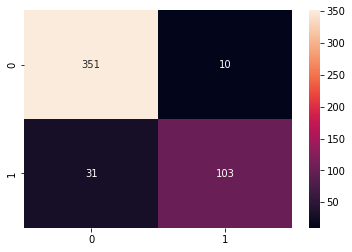

In [84]:
# Predecimos la variable dependiente en el dataset test utilizando el modelo NB best y las variables independientes seleccionadas
y_pred_test_best_NB = pipeline_NB_best.predict(X_test_best)
# Evaluamos el modelo NB best en el dataset test
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_pred_test_best_NB, y_test_enc), annot=True, fmt='g')
print(classification_report(y_pred_test_best_NB, y_test_enc))

Evaluamos la performance del modelo NB best empleando las curvas ROC y Precision Recall para los dataset train y test

Curva ROC para Naive Bayes 



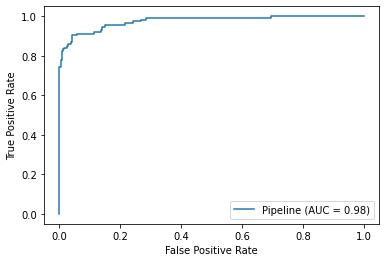

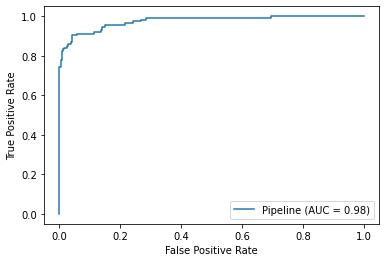

In [88]:
NB_baseline = plot_roc_curve(pipeline_NB, X_test_best, y_test_enc) 
NB_best = plot_roc_curve(pipeline_NB_best, X_test_best, y_test_enc) 
print('Curva ROC para Naive Bayes \n')

Curva Precision Recall para Naive Bayes 



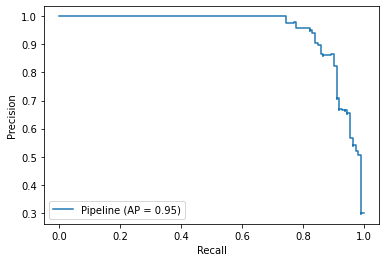

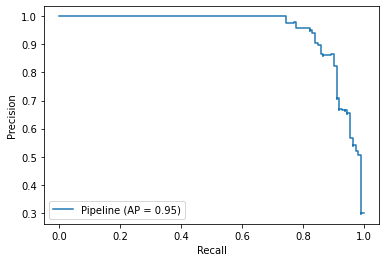

In [90]:
NB_baseline = plot_precision_recall_curve(pipeline_NB, X_test_best, y_test_enc) 
NB_best = plot_precision_recall_curve(pipeline_NB_best, X_test_best, y_test_enc) 
print('Curva Precision Recall para Naive Bayes \n')